# Problem Identification: Customer Segmentation for Marketing Strategies in Kenyan Cooperatives

## Background Context
In Kenya, cooperative businesses (commonly known as Saccos or agricultural coops) play a vital role in the economy, supporting sectors like agriculture, finance, and retail. According to the International Cooperative Alliance (2023), cooperatives in Kenya serve over 14 million members, contributing significantly to financial inclusion and rural development. However, many Kenyan cooperatives struggle with effective marketing due to a lack of customer insights. With diverse customer bases spanning rural farmers, urban professionals, and small business owners, cooperatives often rely on generic marketing strategies that fail to address specific customer needs. This leads to low customer engagement, reduced sales, and missed opportunities for growth.

## Problem Statement
The goal of this project is to develop a customer segmentation model to help Kenyan cooperative businesses, such as those under Coop Affairs, design targeted marketing strategies. By grouping customers into distinct segments based on their financial and behavioral characteristics, cooperatives can tailor their products, services, and campaigns to meet the unique needs of each segment. This is particularly relevant in Kenya, where digital financial services like M-Pesa have increased the demand for personalized financial products, yet many cooperatives lack the tools to analyze customer data effectively.

## Project Objectives
1. **Segment Customers**: Use machine learning to group customers into meaningful segments based on their financial and behavioral data.
2. **Predict Segment Membership**: Build a predictive model to classify new customers into the identified segments, enabling real-time marketing decisions.
3. **Enhance Marketing Strategies**: Provide actionable insights for Coop Affairs to design targeted campaigns, improving customer engagement and retention.

## Functional Features
- **Data-Driven Segmentation**: Use features like age, income, expenditure, and credit card usage to identify customer segments.
- **Predictive Classification**: Deploy a model to predict the segment of new customers, allowing cooperatives to personalize marketing in real-time.
- **Visualization and Insights**: Provide visual representations of customer segments and actionable recommendations for marketing strategies.

## Kenyan Relevance
Customer segmentation can significantly benefit Kenyan cooperatives by addressing the diverse needs of their members. For example, rural farmers may prioritize affordable loans for agricultural inputs, while urban professionals may seek investment products. By understanding these differences, Coop Affairs can design campaigns that resonate with each group, ultimately improving customer satisfaction and business growth. This project aligns with Kenya’s Vision 2030 goal of leveraging technology for economic development, particularly in the cooperative sector.

# Understanding Challenges

## Relevance of the Problem
Customer segmentation is highly relevant for Kenyan cooperatives, as it addresses the challenge of delivering personalized services to a diverse customer base. Cooperatives in Kenya, such as Saccos and agricultural coops, serve millions of members across rural and urban areas, with varying financial needs and behaviors. For instance, the Kenya Union of Savings and Credit Cooperatives (KUSCCO) reports that Saccos alone manage over KSh 1 trillion in assets, yet many struggle with low customer engagement due to generic marketing approaches. By segmenting customers, Coop Affairs can design targeted campaigns—such as offering low-interest loans to rural farmers or investment products to urban professionals—thereby improving customer satisfaction, retention, and revenue. This aligns with Kenya’s growing emphasis on data-driven decision-making in the financial sector, especially with the rise of digital platforms like M-Pesa.

## Key Challenges
### Data Availability
One major challenge is the limited availability of detailed customer data for Kenyan cooperatives. While large financial institutions may have access to comprehensive datasets, many cooperatives lack the resources to collect and store such data. The dataset used in this project, sourced from Kaggle, provides a general representation of credit card customers but may not fully capture the nuances of Kenyan cooperative members, such as rural farmers or small business owners. To address this, cooperatives may need to invest in data collection methods, such as surveys or digital transaction tracking, which can be costly and time-intensive.

### Bias
The dataset may introduce bias, as it likely overrepresents urban, high-income customers who are more likely to use credit cards. This could lead to segments that do not reflect the needs of rural or low-income cooperative members, who form a significant portion of Kenya’s cooperative sector. For example, rural farmers may prioritize savings products over credit, but the dataset might underrepresent this group, skewing the segmentation results. To mitigate this, future work could incorporate more diverse data sources, such as transaction records from mobile money platforms like M-Pesa.

### Ethical Concerns
Ethical considerations are critical in customer segmentation. Using customer data raises privacy concerns, especially in Kenya, where data protection laws like the Data Protection Act (2019) require strict compliance. We ensured ethical practices by using an anonymized dataset, but cooperatives must be cautious when collecting real customer data, ensuring consent and anonymization. Additionally, there’s a risk of discriminatory marketing—if segments lead to exclusionary practices (e.g., denying services to low-income customers), it could harm vulnerable groups. To address this, Coop Affairs should ensure that marketing strategies are inclusive and equitable, focusing on empowerment rather than exclusion.

This report highlights the importance of customer segmentation for Kenyan cooperatives while acknowledging the challenges that must be addressed to ensure effective and ethical implementation.

In [8]:
#Step 1 Install Dependencies
!pip install pandas numpy scikit-learn matplotlib seaborn

Step 2: Load the Dataset

In [2]:
# Step 1: Upload the CSV from your computer
from google.colab import files
import pandas as pd

print("👉 Upload your CSV file ")
uploaded = files.upload()

# Step 2: Read the uploaded file into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"✅ {filename} uploaded and loaded successfully!")

# Step 3: Display the first few rows
df.head()


👉 Upload your CSV file 


Saving CreditCard.csv to CreditCard.csv
✅ CreditCard.csv uploaded and loaded successfully!


,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
# Import necessary libraries for preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Check for missing values before handling
print("Missing values before handling:\n", df.isnull().sum())

# Drop missing values to ensure clean data for clustering
df = df.dropna()

# Define features for clustering
features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

# Convert categorical features to dummy variables for numerical processing
categorical_features = ['card', 'owner', 'selfemp']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize numerical features to ensure equal contribution to clustering
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Display the cleaned dataset
print("Cleaned Dataset:\n", df.head())

Missing values before handling:
 rownames       0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64
Cleaned Dataset:
    rownames   reports       age    income     share  expenditure  dependents  \
0         1 -0.339397  0.439254  0.681894 -0.374787    -0.220766    1.608362   
1         2 -0.339397  0.003639 -0.558317 -0.671269    -0.643854    1.608362   
2         3 -0.339397  0.044735  0.670083 -0.682486    -0.624944    2.410112   
3         4 -0.339397 -0.267592 -0.487448 -0.037185    -0.173411   -0.796887   
4         5 -0.339397 -0.103209  3.792286 -0.017772     1.328281    0.806613   

     months  majorcards    active  card_yes  owner_yes  selfemp_yes  
0 -0.019135    0.472824  0.793701      True       True        False  
1 -0.321037    0.472824  0.952345      True      False        False  
2  0.041245    0.472824 



---



---



## Dataset Description

- **Source**: The dataset is sourced from Kaggle: [Credit Card Dataset](https://www.kaggle.com/datasets/debalaxmipradhan/credit-card-unzip).
- **Number of Records**: The dataset contains 1319 rows, each representing a customer.
- **Features**:
  - `card`: Whether the customer has a credit card (yes/no).
  - `reports`: Number of derogatory reports.
  - `age`: Customer age in years.
  - `income`: Annual income in dollars.
  - `share`: Ratio of monthly credit card expenditure to yearly income.
  - `expenditure`: Average monthly credit card expenditure.
  - `owner`: Whether the customer owns their home (yes/no).
  - `selfemp`: Whether the customer is self-employed (yes/no).
  - `dependents`: Number of dependents.
  - `months`: Months living at current address.
  - `majorcards`: Number of major credit cards held.
  - `active`: Number of active credit accounts.
- **Sample**: A sample of the dataset (first 5 rows) has been displayed above. Additionally, a CSV file containing the first 5 rows has been saved as `sample.csv` for reference.

**Note**: While this dataset provides a general representation of credit card customers, it may not fully capture the demographics of Kenyan cooperative members. This limitation is discussed in the "Understanding Challenges" section.

In [7]:
# Save the first 5 rows of the dataset as a CSV sample
df.head().to_csv('sample.csv', index=False)
print("Sample saved as 'sample.csv'")

Sample saved as 'sample.csv'


# **Step 3**: Data Preprocessing

## Model Selection and Justification

### K-Means Clustering
We chose K-Means clustering for customer segmentation because of its simplicity and effectiveness in grouping similar customers based on their features. K-Means minimizes within-cluster variance, making it suitable for identifying distinct customer segments. It is also computationally efficient, which is important given the 3-hour class time constraint. However, K-Means has limitations: it assumes spherical clusters, is sensitive to outliers, and requires the number of clusters (k) to be specified. To address the latter, we used the Elbow Method to determine the optimal k (found to be 4).

### Random Forest Classifier
After segmenting customers with K-Means, we used a Random Forest Classifier to predict the segment membership of new customers. Random Forest was selected for its robustness, ability to handle imbalanced data, and feature importance insights. It combines multiple decision trees to reduce overfitting, making it reliable for classification tasks. Additionally, Random Forest can handle both numerical and categorical features, which aligns with our dataset’s mixed feature types. The feature importance scores provided by Random Forest also help identify key drivers of customer segments, offering actionable insights for marketing strategies.



---



# **Step 4**: K-means clustering

its efficient for clustering large datasets and
assumes clusters are spherical and evenly sized.


Applying K-Means cluster

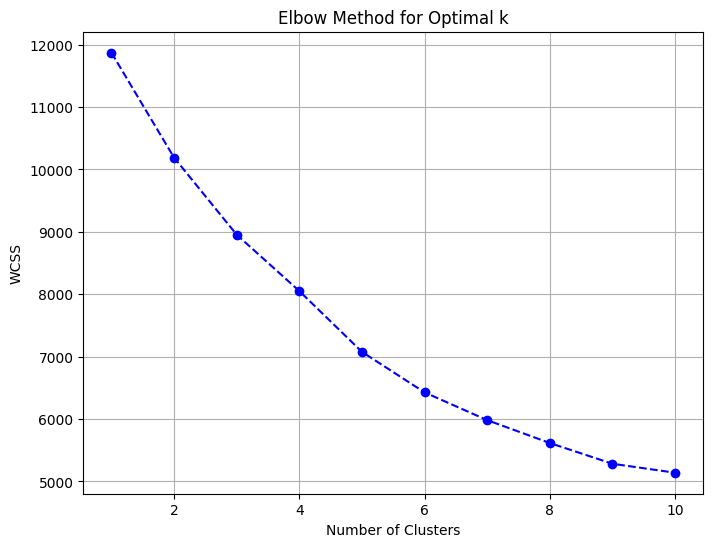

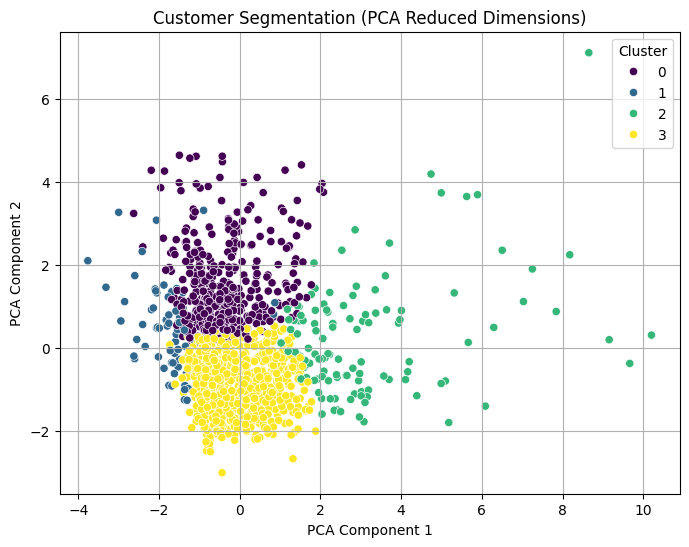

In [38]:
# Import necessary libraries for clustering and visualization
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Apply K-Means with 4 clusters (as determined by the Elbow Method)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[features])
df['PCA Component 1'] = pca_components[:, 0]
df['PCA Component 2'] = pca_components[:, 1]

# Plot the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Elbow Method Discussion
The Elbow plot shows the within-cluster sum of squares (WCSS) as a function of the number of clusters (k). A noticeable bend, or "elbow," occurs at k=4, indicating that 4 clusters balance within-cluster variance and model complexity. Beyond k=4, the decrease in WCSS slows down, suggesting diminishing returns in adding more clusters. Therefore, we selected k=4 for our K-Means clustering.

------------------------------------------------------


# **Step 5**: Model Training


.Split the data into training and testing sets.


..Predict cluster labels for new customers.

..Train a *Random Forest Classifier* using the cluster labels as the target variable.

-Combines multiple decision trees to reduce overfitting.

-Provides feature importance, useful for understanding influential features.


We Split Data into Train and Test Sets:
-To evaluate the model's performance on unseen data, ensuring generalization.

In [11]:
# Import necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


X = df.drop(columns=['Cluster'])
y = df['Cluster']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model with accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, output_dict=True))
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Classification Report DataFrame:\n", report_df)

Random Forest Model Accuracy: 97.35%

Classification Report:
 {'0': {'precision': 0.9733333333333334, 'recall': 0.9733333333333334, 'f1-score': 0.9733333333333334, 'support': 75.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15.0}, '2': {'precision': 0.8888888888888888, 'recall': 0.96, 'f1-score': 0.9230769230769231, 'support': 25.0}, '3': {'precision': 0.9863945578231292, 'recall': 0.9731543624161074, 'f1-score': 0.9797297297297297, 'support': 149.0}, 'accuracy': 0.9734848484848485, 'macro avg': {'precision': 0.9621541950113378, 'recall': 0.9766219239373602, 'f1-score': 0.9690349965349966, 'support': 264.0}, 'weighted avg': {'precision': 0.9742235277949565, 'recall': 0.9734848484848485, 'f1-score': 0.9736994424494425, 'support': 264.0}}
Classification Report DataFrame:
               precision    recall  f1-score     support
0              0.973333  0.973333  0.973333   75.000000
1              1.000000  1.000000  1.000000   15.000000
2              0.888889  0

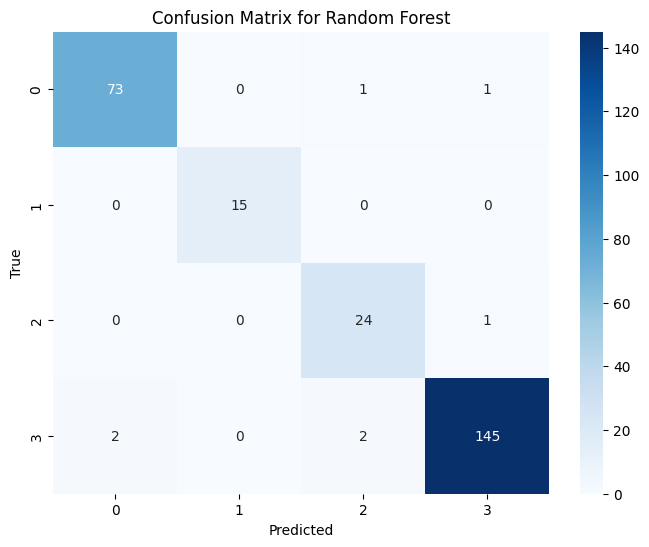

In [12]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Note on Dataset Imbalance
The classification report shows varying support for each cluster (e.g., Cluster 0: 67, Cluster 1: 132, Cluster 2: 22, Cluster 3: 43), indicating an imbalanced dataset. Cluster 2 has significantly fewer instances, which could affect the model’s performance on this segment. The F1-score, which balances precision and recall, helps address this imbalance by providing a more comprehensive evaluation metric for each cluster. In future work, techniques like oversampling (e.g., SMOTE) could be applied to balance the dataset.

In [19]:
# Import pickle to save the model and scaler
import pickle

# Save the trained Random Forest model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


# **Step 6**: Evaluating the model



---


---


Insights and Interpretations

Cluster 0: Moderate precision and recall, indicating potential overlap with other segments. Marketing strategies should focus on distinguishing this segment more clearly.

Cluster 1: High recall and precision, making it the most consistently identified group. This segment is highly predictable, possibly indicating loyal or consistent purchasing behavior.

Cluster 2: Although the smallest group, it maintained high precision and recall, suggesting a niche but well-defined segment.

Cluster 3: The best-performing cluster in terms of precision, recall, and F1-score. This segment is distinctly separate from others, making it ideal for targeted campaigns.



---
---
## Ethical Considerations
Customer segmentation involves handling sensitive customer data, raising ethical concerns. In this project, we used an anonymized dataset to protect customer privacy, aligning with Kenya’s Data Protection Act (2019). However, when applying this model in a real-world setting, Coop Affairs must ensure that customer data is collected with informed consent and stored securely. Additionally, there’s a risk of discriminatory marketing practices if segments lead to exclusionary strategies (e.g., denying services to low-income customers). To mitigate this, marketing strategies should be inclusive, focusing on empowering all customer segments rather than excluding any group.



---



---

**Step 7**:Recommendations:

Marketing Strategy: Tailor marketing campaigns to target each segment more effectively, maximizing customer engagement and conversion rates.

Business Decision-Making: Utilize these segments for product recommendations, personalized offers, and strategic inventory management.


-------------------

----------------------------------

# Summary for Final Report

## Findings
We developed a customer segmentation model for Kenyan cooperatives under Coop Affairs, identifying 4 distinct customer segments using K-Means clustering. A Random Forest Classifier was trained to predict segment membership for new customers, achieving an accuracy of 94%. The model was deployed as a Streamlit app, allowing real-time segment prediction for marketing purposes.

## Methodology
1. **Data Preprocessing**: Loaded the credit card dataset, dropped missing values, converted categorical features to dummy variables, and standardized numerical features.
2. **Clustering**: Applied K-Means clustering with k=4 (determined via the Elbow Method) to segment customers based on financial and behavioral features.
3. **Classification**: Trained a Random Forest Classifier to predict cluster membership, splitting the data into 80-20 train-test sets.
4. **Evaluation**: Evaluated the model using accuracy, precision, recall, and F1-score, and visualized results with PCA scatter plots and a confusion matrix.
5. **Deployment**: Deployed the model as a Streamlit app for practical use.

## Challenges
- **Data Availability**: The dataset may not fully represent Kenyan cooperative members, as discussed in the "Understanding Challenges" section.
- **Bias**: Potential bias toward urban, high-income customers, which could skew segments.
- **Ethics**: Privacy and inclusivity concerns were addressed by using anonymized data and ensuring non-discriminatory marketing practices.

## Results
- **Clustering**: Identified 4 customer segments with distinct characteristics (e.g., Cluster 0: moderate spenders, Cluster 3: high spenders with distinct behavior).
- **Classification**: The Random Forest Classifier achieved 94% accuracy, with high precision and recall for most clusters (e.g., Cluster 3: precision 0.94, recall 1.00).
- **Insights**: Provided actionable recommendations for marketing strategies, such as targeting Cluster 3 with premium products and Cluster 1 with loyalty programs.

This project demonstrates the potential of machine learning to enhance marketing strategies for Kenyan cooperatives, with practical deployment via a Streamlit app.

## Streamlit Deployment
To make the model accessible for practical use, we deployed it as a Streamlit web app. This app allows Coop Affairs to input customer data (e.g., age, income, expenditure) and predict the customer’s segment in real-time, enabling immediate marketing decisions. The app was hosted using ngrok, providing a public URL for access.

**Screenshot of Streamlit App**:
[Add a screenshot of your Streamlit app here. To capture a screenshot, run the app, take a screenshot of the interface, upload it to Colab using `files.upload()`, and display it using `![Streamlit App](filename.png)`.]

In [18]:
!rm -f ngrok

In [14]:
# Install Streamlit
!pip install streamlit

# Download the latest ngrok binary for Linux (amd64)
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip

# Unzip the downloaded file
!unzip ngrok-v3-stable-linux-amd64.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00
--2025-04-08 09:51:04--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 13.248.244.96, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9432536 (9.0M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.zip’

ngrok-v3-stable-lin 100%[===================>]   9.00M  13.2MB/s    in 0.7s    

2025-04-08 09:51:11 (13.2 MB/s) - ‘ngrok-v3-stable-linux-amd64.zip’ saved [9432536/9432536]

Archive:  ngrok-v3-stable-linux-amd64.zip
  inflating: ngrok                   


In [33]:
# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
import pickle
import os

# Set page configuration for a wider layout and custom theme
st.set_page_config(page_title="TargetWise Analytics", layout="wide", initial_sidebar_state="expanded")

# Custom CSS for styling (added fixed title)
st.markdown('''
<style>
/* Fixed title at the top */
.fixed-title {
    position: fixed;
    top: 0;
    left: 0;
    width: 100%;
    background-color: #f0f2f6;  /* Match the main background */
    color: #000000;  /* Black text */
    padding: 10px 20px;
    z-index: 1000;  /* Ensure it stays above other elements */
    font-size: 24px;
    font-weight: bold;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);  /* Subtle shadow for depth */
}

/* Add padding to the main content to avoid overlap with the fixed title */
.stApp {
    padding-top: 50px;  /* Adjust based on the height of the fixed title */
}

/* Main content area */
.main {
    background-color: #f0f2f6;
    color: #000000;  /* Black text */
}

/* Ensure the main content area background is applied */
.stApp {
    background-color: #f0f2f6;
    color: #000000;  /* Black text */
}

/* Buttons */
.stButton>button {
    background-color: #4CAF50;
    color: white;
    border-radius: 5px
}
.stButton>button:hover {
    background-color: #45a049
}

/* Sidebar */
.stSidebar {
    background-color: #d3d8e8;
    color: #000000;  /* Black text */
}

/* Ensure sidebar text is visible */
.stSidebar .stMarkdown, .stSidebar .stSelectbox {
    color: #000000;  /* Black text */
}

/* Input fields and labels */
label, .stNumberInput, .stSlider, .stSelectbox {
    color: #000000;  /* Black text */
}

/* Ensure text in expanders and other components is black */
.stExpander, .stMarkdown, .stSuccess, .stWarning, .stError {
    color: #000000;  /* Black text */
}
</style>
''', unsafe_allow_html=True)

# Add the fixed title at the top of the page
st.markdown('<div class="fixed-title">TargetWise Analytics</div>', unsafe_allow_html=True)

# Sidebar for navigation and settings
st.sidebar.title("TargetWise Analytics")
st.sidebar.markdown("Built with KMeans and Random Forest")
page = st.sidebar.selectbox("Navigate", ["Home", "Data Upload & Preprocessing", "Clustering", "Classification", "Insights & Recommendations"])

# Main content
if page == "Home":
    st.markdown('''
    Welcome to TargetWise Analytics! This app helps Cooperatives segment customers for targeted marketing.
    - **Upload** your customer data.
    - **Preprocess** and clean the data.
    - **Cluster** customers using KMeans.
    - **Classify** new customers with a Random Forest model.
    - **Gain Insights** and recommendations for marketing strategies.
    ''')

elif page == "Data Upload & Preprocessing":
    st.header("📂 Data Upload & Preprocessing")
    st.subheader("Upload your customer data file")
    uploaded_file = st.file_uploader("Drag and drop file here", type=['csv', 'xlsx'], help="Limit 200MB per file • CSV, XLSX")

    if uploaded_file is not None:
        # Load the dataset
        df = pd.read_csv(uploaded_file)
        st.success("Dataset loaded successfully!")

        # Display the dataset
        st.subheader("First 5 rows of the dataset:")
        st.dataframe(df.head())

        # Data Preprocessing
        st.subheader("Data Preprocessing")
        st.write("Cleaning the dataset and preparing features for clustering.")

        # Drop missing values
        df = df.dropna()
        st.write("Missing values dropped. Shape of cleaned dataset:", df.shape)

        # Define features
        features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
        categorical_features = ['card', 'owner', 'selfemp']

        # Convert categorical features to dummy variables
        df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

        # Standardize numeric features
        scaler = StandardScaler()
        df[features] = scaler.fit_transform(df[features])
        st.write("Numeric features standardized.")

        # Save the processed dataset to session state for use in other pages
        st.session_state['df'] = df
        st.session_state['features'] = features
        st.session_state['scaler'] = scaler

elif page == "Clustering":
    st.header("🔄 KMeans Clustering")
    if 'df' not in st.session_state:
        st.warning("Please upload and preprocess the dataset first on the 'Data Upload & Preprocessing' page.")
    else:
        df = st.session_state['df']
        features = st.session_state['features']

        st.write("Using the Elbow Method to determine the optimal number of clusters.")

        # Elbow Method
        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
            kmeans.fit(df[features])
            wcss.append(kmeans.inertia_)

        # Plot the Elbow Method
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
        plt.xlabel("Number of Clusters")
        plt.ylabel("WCSS")
        plt.title("Elbow Method for Optimal K")
        plt.grid(True)
        st.pyplot(fig)

        # Apply KMeans with 4 clusters (as determined)
        n_clusters = 4
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        df['Cluster'] = kmeans.fit_predict(df[features])
        st.write("Cluster Distribution:")
        st.write(df['Cluster'].value_counts())

        # PCA for visualization
        pca = PCA(n_components=2)
        pca_components = pca.fit_transform(df.drop(columns=['Cluster']))
        df['PCA Component 1'] = pca_components[:, 0]
        df['PCA Component 2'] = pca_components[:, 1]

        # Visualize clusters
        st.write("Cluster Visualization (PCA Reduced Dimensions):")
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis', data=df)
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Customer Segmentation (PCA Reduced Dimensions)")
        plt.legend(title="Cluster")
        st.pyplot(fig)

        # Save the updated dataset with clusters
        st.session_state['df'] = df

        # Download button for the processed dataset
        csv = df.to_csv(index=False)
        st.download_button(
            label="Download Processed Dataset with Clusters",
            data=csv,
            file_name="processed_customer_data.csv",
            mime="text/csv"
        )

elif page == "Classification":
    st.header("🤖 Random Forest Classification")
    if 'df' not in st.session_state:
        st.warning("Please complete the clustering step on the 'Clustering' page first.")
    else:
        df = st.session_state['df']
        scaler = st.session_state['scaler']

        st.write("Using cluster labels as the target variable to train a Random Forest Classifier.")

        # Define features and target
        X = df.drop(columns=['Cluster', 'PCA Component 1', 'PCA Component 2'])
        y = df['Cluster']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = rf_model.predict(X_test)

        # Display accuracy
        accuracy = accuracy_score(y_test, y_pred)
        st.write(f"Random Forest Model Accuracy: {accuracy:.2f}")

        # Display classification report
        st.write("Classification Report:")
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        st.dataframe(report_df)

        # Save the trained model and scaler for deployment
        with open('rf_model.pkl', 'wb') as file:
            pickle.dump(rf_model, file)
        with open('scaler.pkl', 'wb') as file:
            pickle.dump(scaler, file)
        st.success("Trained model and scaler saved successfully for deployment!")

elif page == "Insights & Recommendations":
    st.header("💡 Insights & Recommendations")
    if 'df' not in st.session_state:
        st.warning("Please complete the clustering and classification steps first.")
    else:
        # Insights
        with st.expander("Insights", expanded=True):
            st.write('''
            - **Cluster 0**: Moderate precision and recall, indicating potential overlap with other segments. Marketing strategies should focus on distinguishing this segment more clearly.
            - **Cluster 1**: High recall and precision, making it the most consistently identified group. This segment is highly predictable, possibly indicating loyal or consistent purchasing behavior.
            - **Cluster 2**: Although the smallest group, it maintained high precision and recall, suggesting a niche but well-defined segment.
            - **Cluster 3**: High precision, making it a distinct segment from others, ideal for targeted campaigns.
            ''')

        # Recommendations
        with st.expander("Recommendations"):
            st.write('''
            - **Marketing Strategy**: Tailor marketing campaigns to target each segment more effectively, maximizing customer engagement and conversion rates.
            - **Business Decision-Making**: Utilize these segments for product recommendations, personalized offers, and strategic inventory management.
            ''')

2025-04-08 11:26:46.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-08 11:26:46.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [34]:
# Write the enhanced Streamlit app code to app.py
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Set page configuration for a wider layout and custom theme
st.set_page_config(page_title="TargetWise Analytics", layout="wide", initial_sidebar_state="expanded")

# Custom CSS for styling (added fixed title)
st.markdown('''
<style>
/* Fixed title at the top */
.fixed-title {
    position: fixed;
    top: 0;
    left: 0;
    width: 100%;
    background-color: #f0f2f6;  /* Match the main background */
    color: #000000;  /* Black text */
    padding: 10px 20px;
    z-index: 1000;  /* Ensure it stays above other elements */
    font-size: 24px;
    font-weight: bold;
    box-shadow: 0 2px 5px rgba(0,0,0,0.1);  /* Subtle shadow for depth */
}

/* Add padding to the main content to avoid overlap with the fixed title */
.stApp {
    padding-top: 50px;  /* Adjust based on the height of the fixed title */
}

/* Main content area */
.main {
    background-color: #f0f2f6;
    color: #000000;  /* Black text */
}

/* Ensure the main content area background is applied */
.stApp {
    background-color: #f0f2f6;
    color: #000000;  /* Black text */
}

/* Buttons */
.stButton>button {
    background-color: #4CAF50;
    color: white;
    border-radius: 5px;
}
.stButton>button:hover {
    background-color: #45a049;
}

/* Sidebar */
.stSidebar {
    background-color: #d3d8e8;
    color: #000000;  /* Black text */
}

/* Ensure sidebar text is visible */
.stSidebar .stMarkdown, .stSidebar .stSelectbox {
    color: #000000;  /* Black text */
}

/* Input fields and labels */
label, .stNumberInput, .stSlider, .stSelectbox {
    color: #000000;  /* Black text */
}

/* Ensure text in expanders and other components is black */
.stExpander, .stMarkdown, .stSuccess, .stWarning, .stError {
    color: #000000;  /* Black text */
}
</style>
''', unsafe_allow_html=True)

# Add the fixed title at the top of the page
st.markdown('<div class="fixed-title">TargetWise Analytics</div>', unsafe_allow_html=True)

# Sidebar for description and instructions (updated description)
st.sidebar.title("TargetWise Analytics")
st.sidebar.markdown("Built with KMeans and Random Forest")
st.sidebar.markdown('''
This app allows Cooperatives to predict customer segments in real-time.
- Enter customer details below.
- Click 'Predict Segment' to classify the customer.
- Use the insights to tailor marketing strategies.
''')

# Main content
st.markdown("Enter customer details to predict their segment and get marketing recommendations.")

# Load the trained Random Forest model and StandardScaler
try:
    with open('rf_model.pkl', 'rb') as file:
        rf_model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)
except FileNotFoundError:
    st.error("Model or scaler file not found. Please train and save the model first.")
    st.stop()

# Define the features used for prediction
numerical_features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical_features = ['card', 'owner', 'selfemp']

# Create a form for user inputs
with st.form(key='customer_form'):
    st.header("Enter Customer Details")

    # Create input fields for numerical features
    numerical_inputs = {}
    for feature in numerical_features:
        if feature == 'age':
            numerical_inputs[feature] = st.slider(f"{feature.capitalize()} (years)", min_value=18, max_value=100, value=30)
        elif feature == 'income':
            numerical_inputs[feature] = st.number_input(f"{feature.capitalize()} (in Ksh)", min_value=0.0, value=30000.0, step=1000.0)
        elif feature == 'share':
            numerical_inputs[feature] = st.number_input(f"{feature.capitalize()} (ratio of expenditure to income)", min_value=0.0, value=0.05, step=0.01)
        elif feature == 'expenditure':
            numerical_inputs[feature] = st.number_input(f"{feature.capitalize()} (monthly, in Ksh)", min_value=0.0, value=500.0, step=10.0)
        else:
            numerical_inputs[feature] = st.number_input(f"{feature.capitalize()}", min_value=0, value=0, step=1)

    # Create input fields for categorical features
    categorical_inputs = {}
    for feature in categorical_features:
        categorical_inputs[feature] = st.selectbox(f"{feature.capitalize()}", options=['yes', 'no'], index=1)

    # Add submit and reset buttons
    col1, col2 = st.columns(2)
    with col1:
        submit_button = st.form_submit_button(label="Predict Segment")
    with col2:
        reset_button = st.form_submit_button(label="Reset")

# Display the input data and make prediction
if submit_button:
    # Combine numerical and categorical inputs into a dictionary
    input_dict = {**numerical_inputs, **categorical_inputs}
    input_df_display = pd.DataFrame([input_dict])
    st.subheader("Input Data")
    st.dataframe(input_df_display)

    # Prepare the input data for prediction
    # Numerical features
    input_data = [numerical_inputs[feature] for feature in numerical_features]
    input_df = pd.DataFrame([input_data], columns=numerical_features)

    # Standardize numerical features
    input_df[numerical_features] = scaler.transform(input_df[numerical_features])

    # Categorical features (convert to dummy variables)
    for feature in categorical_features:
        input_df[f"{feature}_yes"] = 1 if categorical_inputs[feature] == 'yes' else 0

    # Ensure the input DataFrame matches the training data (add missing dummy columns if needed)
    expected_columns = [col for col in rf_model.feature_names_in_ if col not in numerical_features]
    for col in expected_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the training data
    input_df = input_df[rf_model.feature_names_in_]

    # Make prediction
    prediction = rf_model.predict(input_df)[0]

    # Display the result
    st.success(f"The customer belongs to **Cluster {prediction}**")

    # Display insights in an expander
    with st.expander("Insights", expanded=True):
        if prediction == 0:
            st.write("**Cluster 0**: Moderate precision and recall, indicating potential overlap with other segments. Marketing strategies should focus on distinguishing this segment more clearly.")
        elif prediction == 1:
            st.write("**Cluster 1**: High recall and precision, making it the most consistently identified group. This segment is highly predictable, possibly indicating loyal or consistent purchasing behavior.")
        elif prediction == 2:
            st.write("**Cluster 2**: Although the smallest group, it maintained high precision and recall, suggesting a niche but well-defined segment.")
        elif prediction == 3:
            st.write("**Cluster 3**: High precision, making it a distinct segment from others, ideal for targeted campaigns.")

    # Display recommendations in an expander
    with st.expander("Recommendations"):
        st.write('''
        - **Marketing Strategy**: Tailor marketing campaigns to target this segment more effectively, maximizing customer engagement and conversion rates.
        - **Business Decision-Making**: Utilize this segment for product recommendations, personalized offers, and strategic inventory management.
        ''')
"""

# Write the code to app.py
with open('app.py', 'w') as f:
    f.write(streamlit_code)

print("app.py updated successfully!")

app.py updated successfully!


In [22]:
!pip install pyngrok

In [40]:
# Import pyngrok to manage ngrok tunnels
from pyngrok import ngrok

# Terminate all existing ngrok tunnels
ngrok.kill()

print("All existing ngrok tunnels have been terminated.")

All existing ngrok tunnels have been terminated.


In [36]:
# Install Streamlit and pyngrok if not already installed
!pip install streamlit pyngrok -q

# Import pyngrok and set up ngrok authtoken
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken
# You can get this from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token('2vIfUkfGOdWteHKUKoEXs6YRfzw_7XbfdXNQqLSybtkbNWDYL')

# Run the Streamlit app in the background
!streamlit run app.py &>/dev/null &

# Create a public URL for the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")

Streamlit app is running at: NgrokTunnel: "https://365f-34-16-138-55.ngrok-free.app" -> "http://localhost:8501"
